In [43]:
import pandas as pd
import os

pd.set_option('display.max_rows', 100)

BLOGDIR = os.path.expanduser("~/src/colinmorris.github.com/assets/not/")
def savefig(fig, name, **kwargs):
    if '.' not in name:
        name += '.png'
    path = os.path.join(BLOGDIR, name)
    fig.savefig(path, **kwargs)


df = pd.read_csv('comments.csv')
df['date'] = pd.to_datetime(df.timestamp, origin='unix', unit='s')

# the non-gerund patterns have pretty poor precision, so exclude them from the analysis
GERUNDS_ONLY = 1
if GERUNDS_ONLY:
    nongerunds = ['omg_not', 'lmao_not']
    df = df.loc[~df.phrase.isin(nongerunds)]

df.head()

,phrase,sub,timestamp,author,date
0,not_me_thinking,FreeCompliments,1617238551,Diced_lettuce,2021-04-01 00:55:51
1,not_me_thinking,BravoRealHousewives,1617227396,GemmaaLD96,2021-03-31 21:49:56
2,not_me_thinking,piercing,1617215311,aecelese,2021-03-31 18:28:31
3,not_me_thinking,SpoiledDragRace,1617211855,lukendyer,2021-03-31 17:30:55
4,not_me_thinking,ApplyingToCollege,1617208140,usedoboereed,2021-03-31 16:29:00


In [56]:
subcounts = df.groupby('sub').size().sort_values(ascending=False).head(15)
subcounts

sub
SpoiledDragRace       125
popheads               97
rupaulsdragrace        76
thebachelor            37
memes                  32
queensofleague         29
EDanonymemes           28
teenagers              25
ApplyingToCollege      25
popheadscirclejerk     25
BigBrother             24
rpdrcringe             17
AskReddit              17
RoyaleHigh_Roblox      14
RoyaleHighTrading      10
dtype: int64

<AxesSubplot:ylabel='sub'>

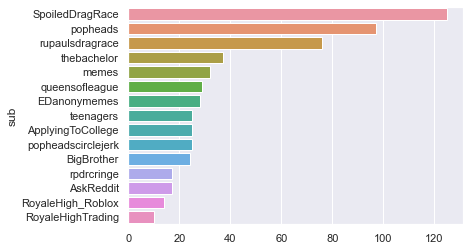

In [59]:
sns.barplot(y=subcounts.index, x=subcounts)

In [70]:
subcounts = df.groupby('sub').size().sort_values(ascending=False)
subcounts.to_csv('sub_counts.csv')

In [45]:
df.groupby('author').size().sort_values(ascending=False).head(15)

author
raw_tomato              5
doughnutsfan            4
unnouveauladybug        4
h3llo_k1tty4            4
colinisso               3
my_name_jeff_in_drag    3
Bumble-Bee17            3
therealadoredelano28    3
bkkbbk                  3
teamtylerandhannah      3
MisterAmericana         3
Akolalime               3
sparklypinktutu         3
Sunx_Halo               3
DimPacifist             3
dtype: int64

In [66]:
df.groupby('phrase').size().sort_values(ascending=False)

phrase
not_me_thinking      825
not_me_trying        227
not_you_trying       101
not_you_thinking      75
not_me_taking         66
not_you_using         65
not_me_using          61
not_them_using        53
not_them_trying       40
not_you_acting        33
not_them_thinking     23
not_you_taking        21
not_them_acting       16
not_me_acting          5
not_them_taking        5
dtype: int64

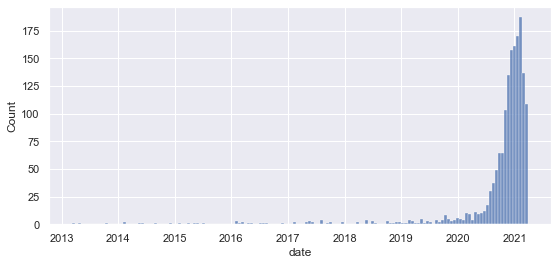

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

FS = (9, 4)
fig, ax = plt.subplots(figsize=FS)

sns.histplot(data=df[df.date >= datetime.datetime(2012, 1, 1)], 
             #x='timestamp',
             x='date',
             ax=ax,
             #bins=9*6,
            );
savefig(fig, 'reddit_counts_over_time.png')

In [69]:
print(
    len(df),
    len(df[df.date >= datetime.datetime(2020, 1, 1)])
)

1616 1495


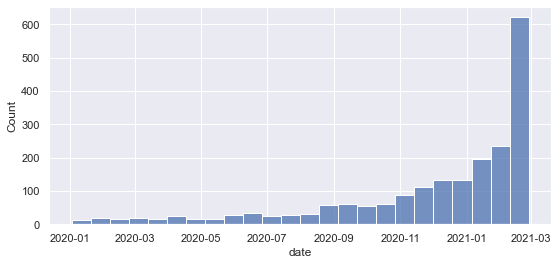

In [27]:
FS = (9, 4)
fig, ax = plt.subplots(figsize=FS)

sns.histplot(data=df[df.date >= datetime.datetime(2020, 1, 1)], 
             #x='timestamp',
             x='date',
             ax=ax,
            );

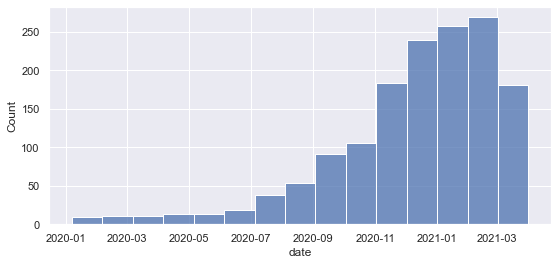

In [55]:
FS = (9, 4)
fig, ax = plt.subplots(figsize=FS)

sns.histplot(data=df[df.date >= datetime.datetime(2020, 1, 1)], 
             #x='timestamp',
             x='date',
             ax=ax,
             bins=15,
            );
savefig(fig, 'reddit_counts_2020_on.png')

In [64]:
rec = df.loc[df.date >= datetime.datetime(2020, 1, 1)]
rec.groupby(pd.Grouper(freq='M', key='date')).size()

date
2020-01-31      9
2020-02-29      7
2020-03-31     13
2020-04-30     14
2020-05-31     15
2020-06-30     17
2020-07-31     34
2020-08-31     55
2020-09-30     86
2020-10-31    110
2020-11-30    182
2020-12-31    245
2021-01-31    271
2021-02-28    256
2021-03-31    179
2021-04-30      2
Freq: M, dtype: int64